In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm

simulation_path = "../generated_data/multiGBM_simple_1000/"
time_format = "%Y-%m-%d"

In [34]:
date_to_v_0 = {}
for cur_date in tqdm(pd.bdate_range("2022-05-31", "2022-10-31")):
    cur_date = cur_date + pd.Timedelta(days = 1)
    sim_df = pd.read_csv(simulation_path + cur_date.strftime(time_format) + "v_0" + ".csv", names = ["index", "price"], header=1)
    date_to_v_0[cur_date.strftime(time_format)] = sim_df

100%|██████████| 110/110 [00:00<00:00, 586.59it/s]


In [35]:
sim_price_path = [[date, prices["price"].mean()] for date, prices in date_to_v_0.items()]

In [49]:
true_price_df = pd.read_csv("true_product_price.csv")
true_price_df = true_price_df.assign(date = lambda x:  pd.to_datetime(x.Dates, format = "%d/%m/%Y")).drop(columns = "Dates").set_index("date")
true_price_df

,PX_LAST
date,
2022-05-02,99.38
2022-05-03,99.38
2022-05-04,99.38
2022-05-05,99.38
2022-05-06,98.93
...,...
2022-10-25,87.55
2022-10-26,86.98
2022-10-27,85.03


<AxesSubplot:xlabel='date'>

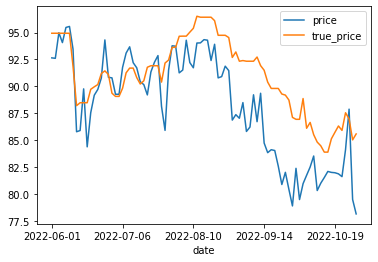

In [54]:
((pd.DataFrame(sim_price_path, columns = ["date", "price"]).set_index("date") / 5000 * 100)
.assign(true_price = true_price_df["PX_LAST"])
).dropna().plot()

In [53]:
((pd.DataFrame(sim_price_path, columns = ["date", "price"]).set_index("date") / 5000 * 100)
.assign(true_price = true_price_df["PX_LAST"]))

,price,true_price
date,,
2022-06-01,92.651338,94.94
2022-06-02,92.608567,94.94
2022-06-03,94.986686,94.94
2022-06-04,93.753770,NaN
2022-06-07,94.070975,94.94
...,...,...
2022-10-26,87.883974,86.98
2022-10-27,79.488112,85.03
2022-10-28,78.147358,85.58
